# Prediksi Produktivitas Buruh Pada Perusahaan Pakaian [Regresi] .v2

In [1]:
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
import xgboost  as xgb
import lightgbm as lgb
import catboost as cat

In [3]:
from sklearn.feature_selection     import RFE, SelectKBest
from sklearn.model_selection       import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neural_network        import MLPRegressor
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model          import LinearRegression
from sklearn.neighbors             import KNeighborsRegressor
from sklearn.ensemble              import RandomForestRegressor
from sklearn.metrics               import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree                  import DecisionTreeRegressor
from sklearn.svm                   import SVR
from scipy.stats                   import randint
from catboost                      import CatBoostRegressor
from pyforest                      import *


In [4]:
X = pd.read_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/X_skala2.csv')
df = pd.read_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/df2.csv')
y = pd.read_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/y2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
X

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_encod,department_finishing,department_finishing,department_sweing
0,8,0.80,0.450252,-0.374053,0.464567,4.595120,0.0,0,0,0.655172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.75,0.020132,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11,0.80,0.164731,-1.009072,0.240157,3.931826,0.0,0,0,0.327586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12,0.80,0.164731,-1.009072,0.240157,3.931826,0.0,0,0,0.327586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,0.80,0.445219,-0.092831,0.125984,3.931826,0.0,0,0,0.620690,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,0.000000,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1193,8,0.70,0.019357,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1194,7,0.65,0.019357,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1195,9,0.75,0.000000,0.000000,0.118110,0.000000,0.0,0,0,0.149425,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   float64
 5   incentive              1197 non-null   float64
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  day_Monday             1197 non-null   float64
 11  day_Saturday           1197 non-null   float64
 12  day_Sunday             1197 non-null   float64
 13  day_Thursday           1197 non-null   float64
 14  day_Tuesday            1197 non-null   float64
 15  day_

In [7]:
y

,actual_productivity
0,0.940725
1,0.886500
2,0.800570
3,0.800570
4,0.800382
...,...
1192,0.628333
1193,0.625625
1194,0.625625
1195,0.505889


### Feature Selection

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

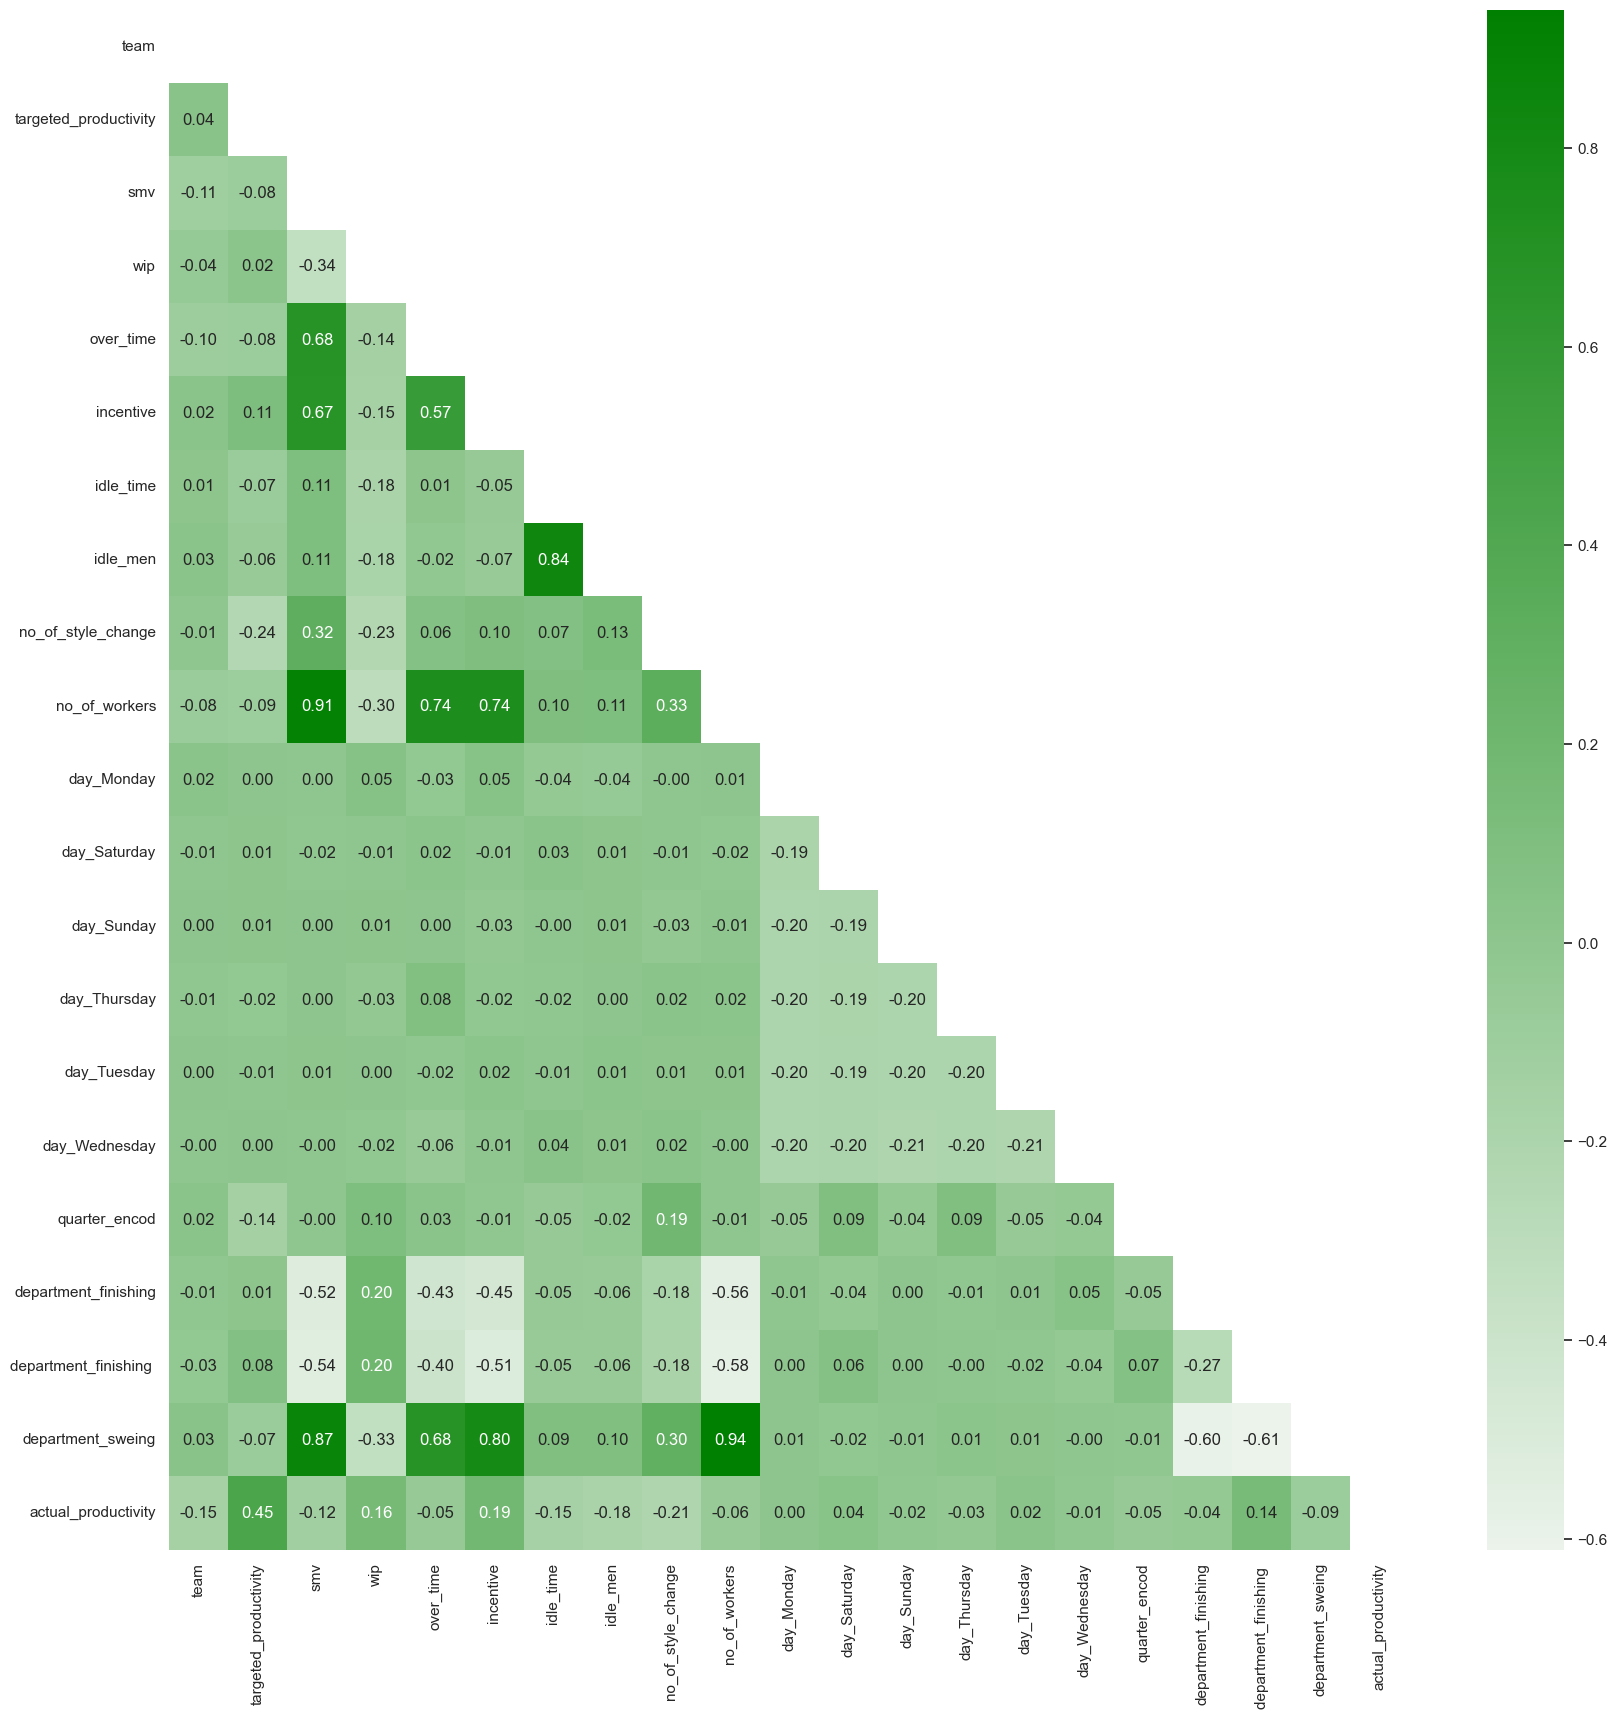

In [8]:
# viz
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.set_style("white")
cmap = sns.light_palette("green", as_cmap=True)

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),
            annot=True,
            cmap=cmap,
            fmt='.2f',
            mask=mask)

plt.show()

#### Variabel yang positif terhadap variabel target
- `targeted_productivity`
- `incentive`

*perlu dilakukan pencarian fitur terbaik*

In [9]:
df.shape

(1197, 21)

### Recursive Feature Elimination (RFE)
RFE adalah metode iteratif yang memilih fitur-fitur terbaik dengan cara melakukan berulang kali membangun model dan menghapus fitur yang paling sedikit berkontribusi pada model. Tujuan utamanya adalah untuk meningkatkan kinerja model dengan mengurangi jumlah fitur yang tidak relevan atau redundant.

Bebas pilih model regresi apa saja untuk mengevaluasi setiap fitur.


In [10]:
model_fitur_linear = LinearRegression()
n_fitur_pilih      = 13

rfe                = RFE(estimator=model_fitur_linear,
                         n_features_to_select=n_fitur_pilih)

<IPython.core.display.Javascript object>

In [11]:
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [12]:
fitur_pilih = X.columns[rfe.support_]
fitur_pilih

Index(['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'no_of_style_change', 'no_of_workers', 'day_Saturday',
       'day_Tuesday', 'department_finishing', 'department_finishing ',
       'department_sweing'],
      dtype='object')

In [13]:
fitur_rank = pd.Series(rfe.ranking_, index=X.columns)
fitur_rank.sort_values()

<IPython.core.display.Javascript object>

team                     1
department_finishing     1
day_Tuesday              1
day_Saturday             1
department_finishing     1
no_of_style_change       1
no_of_workers            1
incentive                1
over_time                1
smv                      1
targeted_productivity    1
idle_time                1
department_sweing        1
day_Monday               2
wip                      3
idle_men                 4
day_Wednesday            5
day_Thursday             6
day_Sunday               7
quarter_encod            8
dtype: int32

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

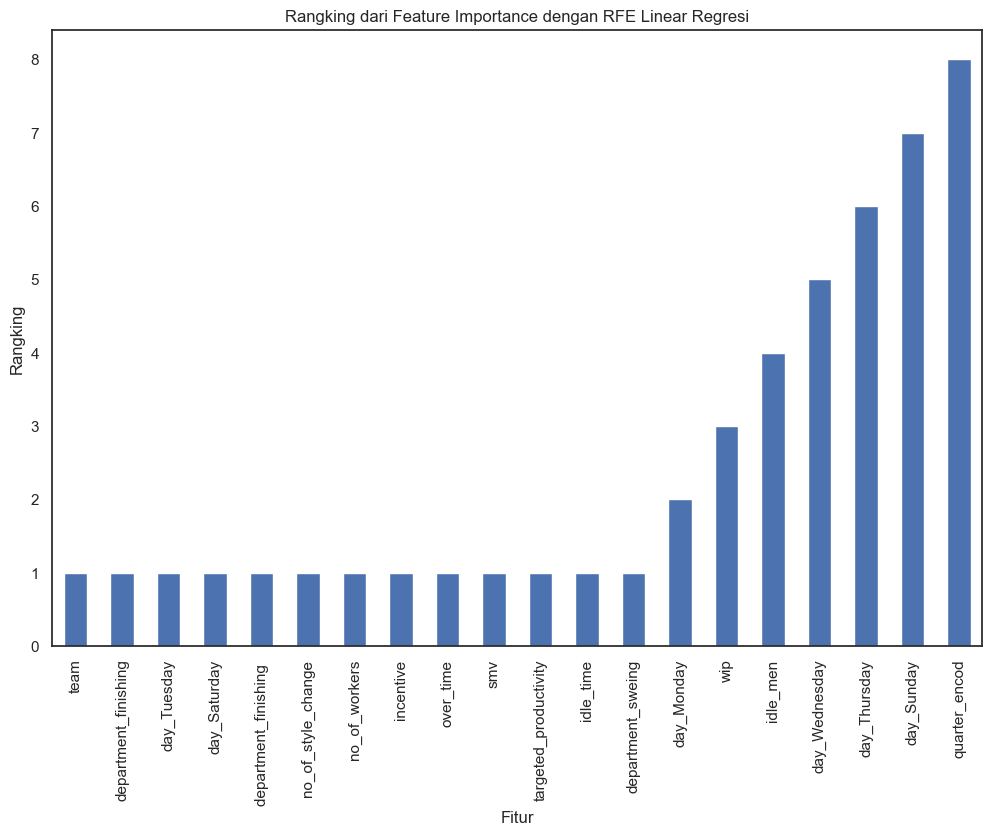

In [14]:
plt.figure(figsize=(12, 8))
fitur_rank.sort_values().plot(kind='bar')
plt.title('Rangking dari Feature Importance dengan RFE Linear Regresi')
plt.xlabel('Fitur')
plt.ylabel('Rangking')
plt.show()

In [15]:
X_baru = X[fitur_pilih]

In [16]:
X_baru

,team,targeted_productivity,smv,over_time,incentive,idle_time,no_of_style_change,no_of_workers,day_Saturday,day_Tuesday,department_finishing,department_finishing,department_sweing
0,8,0.80,0.450252,0.464567,4.595120,0.0,0,0.655172,0.0,0.0,0.0,0.0,1.0
1,1,0.75,0.020132,0.062992,0.000000,0.0,0,0.068966,0.0,0.0,0.0,1.0,0.0
2,11,0.80,0.164731,0.240157,3.931826,0.0,0,0.327586,0.0,0.0,0.0,0.0,1.0
3,12,0.80,0.164731,0.240157,3.931826,0.0,0,0.327586,0.0,0.0,0.0,0.0,1.0
4,6,0.80,0.445219,0.125984,3.931826,0.0,0,0.620690,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,0.000000,0.062992,0.000000,0.0,0,0.068966,0.0,0.0,1.0,0.0,0.0
1193,8,0.70,0.019357,0.062992,0.000000,0.0,0,0.068966,0.0,0.0,1.0,0.0,0.0
1194,7,0.65,0.019357,0.062992,0.000000,0.0,0,0.068966,0.0,0.0,1.0,0.0,0.0
1195,9,0.75,0.000000,0.118110,0.000000,0.0,0,0.149425,0.0,0.0,1.0,0.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_baru,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

<IPython.core.display.Javascript object>

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(897, 13)
(300, 13)
(897, 1)
(300, 1)


In [19]:
X_train

,team,targeted_productivity,smv,over_time,incentive,idle_time,no_of_style_change,no_of_workers,day_Saturday,day_Tuesday,department_finishing,department_finishing,department_sweing
1183,10,0.75,0.366241,0.393701,3.555348,0.000000,0,0.551724,0.0,0.0,0.0,0.0,1.0
227,6,0.80,0.168602,0.372047,3.931826,0.000000,0,0.339080,0.0,1.0,0.0,0.0,1.0
692,12,0.80,0.022842,0.070866,0.000000,0.000000,0,0.080460,0.0,1.0,1.0,0.0,0.0
522,4,0.80,0.020132,0.078740,0.000000,0.000000,0,0.091954,1.0,0.0,0.0,1.0,0.0
788,3,0.55,0.024197,0.062992,0.000000,0.000000,0,0.068966,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,5,0.70,0.032907,0.220472,0.000000,0.000000,0,0.068966,0.0,1.0,1.0,0.0,0.0
1095,6,0.55,0.000000,0.062992,0.000000,0.000000,0,0.068966,1.0,0.0,1.0,0.0,0.0
1130,5,0.60,0.020132,0.000000,4.836282,0.000000,0,0.114943,0.0,0.0,1.0,0.0,0.0
860,7,0.75,0.526520,0.000000,0.000000,1.791759,1,0.655172,0.0,0.0,0.0,0.0,1.0


## Modelling

In [20]:
def regression_model_report(y_true, y_pred):
    y_true = np.ravel(y_true)  # array 1D
    y_pred = np.ravel(y_pred)  # array 1D
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Mencari smape dengan rumus
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    
    print("MAE: {:.4f}".format(mae))  # Mean Absolute Error
    print("MSE: {:.4f}".format(mse))  # Mean Squared Error
    print("RMSE: {:.4f}".format(rmse))  # Root Mean Squared Error
    print("sMAPE: {:.4f}%".format(smape))  # Symmetric Mean Absolute Percentage Error

#### Smape
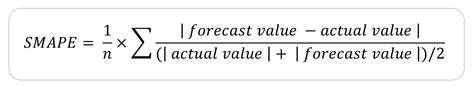

In [21]:
linear_regression       = LinearRegression()
knn_regressor           = KNeighborsRegressor(n_neighbors=30, algorithm="auto")  # 'auto' mencari algoritma terbaiknya
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, criterion="squared_error")
random_forest_regressor = RandomForestRegressor(max_depth=15, criterion="squared_error", n_estimators=38)
svm_rbf_regressor       = SVR(kernel='rbf')
mlp_regressor           = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
xgboost_regressor       = xgb.XGBRegressor()
lightgbm_regressor      = lgb.LGBMRegressor()
catboost_regressor      = CatBoostRegressor(verbose=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
models = {
    "Linear Regression"       : linear_regression,
    "KNN Regression"          : knn_regressor,
    "Decision Tree Regression": decision_tree_regressor,
    "Random Forest Regression": random_forest_regressor,
    "SVM RBF Regression"      : svm_rbf_regressor,
    "MLP Regression"          : mlp_regressor,
    "XGBoost Regression"      : xgboost_regressor,
    "LightGBM Regression"     : lightgbm_regressor,
    "CatBoost Regression"     : catboost_regressor
}

### Latih Data

In [23]:
print("*" * 46, "Performa Model ML pada Data Train", "*" * 46, "\n")

for nama_model, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    print(f"{nama_model} Train: ")
    regression_model_report(y_train, y_pred_train)
    print("=" * 25 + "\n")

********************************************** Performa Model ML pada Data Train ********************************************** 

Linear Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1006
MSE: 0.0189
RMSE: 0.1375
sMAPE: 15.1281%

KNN Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1026
MSE: 0.0205
RMSE: 0.1433
sMAPE: 15.6127%

Decision Tree Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0345
MSE: 0.0056
RMSE: 0.0747
sMAPE: 5.3600%

Random Forest Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0349
MSE: 0.0038
RMSE: 0.0617
sMAPE: 5.8259%

SVM RBF Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1025
MSE: 0.0190
RMSE: 0.1379
sMAPE: 15.4921%

MLP Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0965
MSE: 0.0179
RMSE: 0.1337
sMAPE: 14.5907%

XGBoost Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0212
MSE: 0.0023
RMSE: 0.0475
sMAPE: 3.4092%

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 897, number of used features: 12
[LightGBM] [Info] Start training from score 0.733990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0505
MSE: 0.0069
RMSE: 0.0831
sMAPE: 8.1434%

CatBoost Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0410
MSE: 0.0047
RMSE: 0.0689
sMAPE: 6.5490%



### Uji / Test Data

In [24]:
X_test

,team,targeted_productivity,smv,over_time,incentive,idle_time,no_of_style_change,no_of_workers,day_Saturday,day_Tuesday,department_finishing,department_finishing,department_sweing
921,1,0.60,0.379985,0.330709,0.000000,0.0,1,0.459770,0.0,1.0,0.0,0.0,1.0
321,6,0.80,0.164731,0.287402,3.931826,0.0,0,0.333333,0.0,0.0,0.0,0.0,1.0
101,8,0.80,0.000000,0.094488,0.000000,0.0,0,0.068966,0.0,1.0,0.0,1.0,0.0
920,2,0.70,0.019357,0.062992,0.000000,0.0,0,0.068966,0.0,1.0,1.0,0.0,0.0
58,7,0.80,0.000000,0.062992,0.000000,0.0,0,0.068966,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,6,0.70,0.397019,0.299213,3.433987,0.0,1,0.413793,0.0,1.0,0.0,0.0,1.0
461,10,0.80,0.379791,0.440945,4.262680,0.0,0,0.620690,0.0,1.0,0.0,0.0,1.0
801,9,0.60,0.307588,0.354331,0.000000,0.0,1,0.597701,0.0,0.0,0.0,0.0,1.0
1054,12,0.80,0.239257,0.267717,3.931826,0.0,0,0.367816,0.0,0.0,0.0,0.0,1.0


In [25]:
print("*"*50, "Performa Testing Model ML", "*"*50, "\n")

for nama_model, model in models.items():

    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    print(f"{nama_model} Test: ")
    regression_model_report(y_test, y_pred_test)

    print("="*25 + "\n")

************************************************** Performa Testing Model ML ************************************************** 

Linear Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1015
MSE: 0.0210
RMSE: 0.1451
sMAPE: 15.3946%

KNN Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1062
MSE: 0.0220
RMSE: 0.1482
sMAPE: 15.8421%

Decision Tree Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0950
MSE: 0.0268
RMSE: 0.1638
sMAPE: 14.9091%

Random Forest Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0764
MSE: 0.0170
RMSE: 0.1302
sMAPE: 11.8856%

SVM RBF Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1062
MSE: 0.0215
RMSE: 0.1467
sMAPE: 15.7859%

MLP Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1079
MSE: 0.0231
RMSE: 0.1519
sMAPE: 16.6465%

XGBoost Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0846
MSE: 0.0198
RMSE: 0.1408
sMAPE: 12.8197%

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 897, number of used features: 12
[LightGBM] [Info] Start training from score 0.733990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0839
MSE: 0.0171
RMSE: 0.1308
sMAPE: 13.0323%

CatBoost Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0814
MSE: 0.0172
RMSE: 0.1311
sMAPE: 12.5110%



### Analisis Hasil Evaluasi Model Train & Test

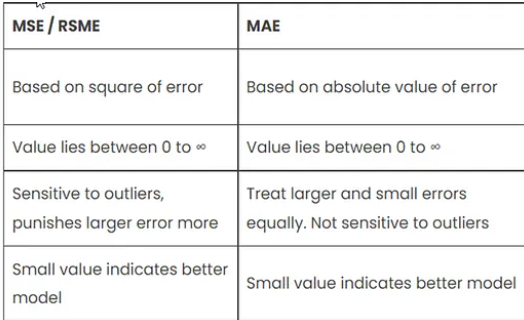

**Interpretasi SMAPE**
- sMAPE = 0%: Model prediksi sempurna, tanpa kesalahan.
- sMAPE > 0%: Ada kesalahan dalam prediksi model.


- sMAPE yang lebih rendah: Menunjukkan model dengan kesalahan yang lebih kecil dan performa yang lebih baik.
- sMAPE yang lebih tinggi: Menunjukkan model dengan kesalahan yang lebih besar dan performa yang lebih buruk.

- `Linear Regression`:
Model ini memiliki performa sedang pada data train dan data test, yaitu tidak terlalu rendah dan tidak terlalu tinggi yaitu **stabil**, menunjukkan bahwa model ini tidak mengalami overfitting atau underfitting yang signifikan, namun tidak terlalu bagus digunakan.

- `KNN Regression`:
Model ini juga memiliki performa yang **stabil** pada data train dan data test, namun tidak terlalu bagus digunakan.

- `Decision Tree Regression`:
Model ini cukup baik dalam memprediksi nilai aktual produktivitas buruh pada data train, namun performa model menurun jika dilihat dari sMAPE sehingga ada kemungkinan model mengalami **overfitting**.

- `Random Forest Regression`:
Model ini juga memiliki performa yang sangat baik pada data train, namun performa model menurun ketika diterapkan pada data testing sehingga model mungkin **overfitting**

- `SVM RBF Regression`:
Pada data train, model ini memiliki nilai parameter yang relatif tinggi. Ketika pada data test, nilai-nilai tersebut tidak berbeda jauh, menunjukkan bahwa model ini tidak mengalami overfitting atau underfitting yang signifikan atau **stabil** namun tidak terlalu bagus digunakan.

- `MLP Regression`:
Hasil nilai evaluasi pada data train dan data test cukup stabil dengan nilai parameter cukup tinggi berada pada rentang 0,1, hal ini menunjukkan model mengalami sedikit **overfitting**.

- `XGBoost Regression`:
Pada data train, model ini memiliki performa yang sangat bagus dengan parameter evaluasi yang relatif rendah. Ketika pada data test, performa model sedikit menurun, namun hal ini masih bisa dioptimalkan untuk tujuan **good fit**.

- `LightGBM Regression`:
Pada data train, model ini memiliki nilai MAE, MSE, RMSE, dan sMAPE yang relatif rendah, menunjukkan bahwa model ini cukup baik dalam memprediksi nilai aktual produktivitas buruh. Pada data test, nilai-nilai tersebut sedikit meningkat sehingga masih bisa dioptimalkan untuk **good fit**.

- `CatBoost Regression`:
Hampir sama seperti LightGBM namun CatBoost ini memiliki performa yang sedikit lebih baik, sehingga masih bisa dioptimalkan untuk **good fit**.

### Memilih Model Terbaik
- Nilai MAE, MSE, dan RMSE akan sangat bagus jika dibawah atau lebih kecil dari 0,1
- Nilai SMAPE yang dipilih itu pada rentant 10% - 15%

### Top 3 Model Terbaik
1. **Random Forest Regression**
2. **CatBoost Regression**
3. **XGBoost Regression**

In [26]:
def regression_model_report_viz(y_true, y_pred):
    y_true = np.ravel(y_true)  # array 1D
    y_pred = np.ravel(y_pred)  # array 1D
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Mencari smape dengan rumus
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    
    print("MAE: {:.4f}".format(mae))  # Mean Absolute Error
    print("MSE: {:.4f}".format(mse))  # Mean Squared Error
    print("RMSE: {:.4f}".format(rmse))  # Root Mean Squared Error
    print("sMAPE: {:.4f}%".format(smape))  # Symmetric Mean Absolute Percentage Error
    
    # Visualisasi Scatter Plot Actual vs. Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Prediksi', alpha=0.5)
    plt.scatter(y_true, y_true, c='green', label='Aktual', alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')
    plt.title('Scatter Plot Aktual vs. Prediksi')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Residuals
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, c='purple', label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Nilai Prediksi')
    plt.ylabel('Residual')
    plt.title('Residuals Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

### Hyperparameter Tuning

#### Catboost

In [27]:
cat_cv = CatBoostRegressor()

parameter_cat = {
    'learning_rate': np.linspace(0.01, 0.3),
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': randint(50, 200)
}

grid_cv_cat = RandomizedSearchCV(cat_cv,
                                 param_distributions=parameter_cat,
                                 n_iter=50,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 verbose=0)

grid_cv_cat.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0:	learn: 0.1683623	total: 2.55ms	remaining: 455ms
1:	learn: 0.1620270	total: 3.67ms	remaining: 324ms
2:	learn: 0.1549705	total: 4.55ms	remaining: 267ms
3:	learn: 0.1500052	total: 5.43ms	remaining: 237ms
4:	learn: 0.1455794	total: 6.23ms	remaining: 217ms
5:	learn: 0.1413772	total: 7.05ms	remaining: 203ms
6:	learn: 0.1378978	total: 7.88ms	remaining: 194ms
7:	learn: 0.1352290	total: 8.43ms	remaining: 180ms
8:	learn: 0.1327350	total: 9.2ms	remaining: 174ms
9:	learn: 0.1302902	total: 9.92ms	remaining: 168ms
10:	learn: 0.1278013	total: 10.7ms	remaining: 163ms
11:	learn: 0.1260119	total: 11.4ms	remaining: 158ms
12:	learn: 0.1240278	total: 12.1ms	remaining: 155ms
13:	learn: 0.1227953	total: 12.8ms	remaining: 151ms
14:	learn: 0.1213679	total: 15.2ms	remaining: 166ms
15:	learn: 0.1200493	total: 16.1ms	remaining: 164ms
16:	learn: 0.1190297	total: 17ms	remaining: 162ms
17:	learn: 0.1182357	total: 17.7ms	remaining: 158ms
18:	learn: 0.1177499	total: 18.4ms	remaining: 155ms
19:	learn: 0.1166830	tota

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001B63C8F34D0>,
                   n_iter=50,
                   param_distributions={'depth': [4, 6, 8, 10],
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B63BBE9A90>,
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': array([0.01      , 0.01591837, 0.02183673, 0.0277551 , 0.03367347,
       0.03959184, 0.04...
       0.12836735, 0.13428571, 0.14020408, 0.14612245, 0.15204082,
       0.15795918, 0.16387755, 0.16979592, 0.17571429, 0.18163265,
       0.18755102, 0.19346939, 0.19938776, 0.20530612, 0.21122449,
       0.21714286, 0.22306122, 0.22897959, 0.23489796, 0.24081633,
       0.24673469, 0.25265306, 0.25857143, 0.2644898 , 0.27040816,
       0.27632653, 0.2822449 , 0.28816327, 0.29408163, 0.3       ])},
                   scoring='neg_mean_squared_error')

In [28]:
grid_cv_cat.best_params_

{'depth': 6,
 'iterations': 179,
 'l2_leaf_reg': 5,
 'learning_rate': 0.14612244897959184}

In [29]:
# MSE Negatif    
grid_cv_cat.best_score_

-0.014920766632118273

In [30]:
cat_best = CatBoostRegressor(learning_rate=0.19346938775510206,
                             l2_leaf_reg=7,
                             depth=4,
                             iterations=165)

cat_best.fit(X_train, y_train)

0:	learn: 0.1692071	total: 742us	remaining: 122ms
1:	learn: 0.1622599	total: 1.65ms	remaining: 135ms
2:	learn: 0.1557701	total: 2.23ms	remaining: 121ms
3:	learn: 0.1520667	total: 2.77ms	remaining: 112ms
4:	learn: 0.1470294	total: 3.32ms	remaining: 106ms
5:	learn: 0.1439348	total: 3.88ms	remaining: 103ms
6:	learn: 0.1392119	total: 4.44ms	remaining: 100ms
7:	learn: 0.1371778	total: 5.01ms	remaining: 98.4ms
8:	learn: 0.1352070	total: 6.36ms	remaining: 110ms
9:	learn: 0.1323586	total: 7.5ms	remaining: 116ms
10:	learn: 0.1305308	total: 8.14ms	remaining: 114ms
11:	learn: 0.1294677	total: 8.68ms	remaining: 111ms
12:	learn: 0.1278153	total: 9.22ms	remaining: 108ms
13:	learn: 0.1268456	total: 9.76ms	remaining: 105ms
14:	learn: 0.1249703	total: 10.3ms	remaining: 103ms
15:	learn: 0.1245534	total: 10.9ms	remaining: 102ms
16:	learn: 0.1234583	total: 11.5ms	remaining: 100ms
17:	learn: 0.1225596	total: 12.1ms	remaining: 98.9ms
18:	learn: 0.1221452	total: 12.7ms	remaining: 97.5ms
19:	learn: 0.1209093	

In [31]:
y_tt_cat_best = cat_best.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0846
MSE: 0.0169
RMSE: 0.1300
sMAPE: 13.0961%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

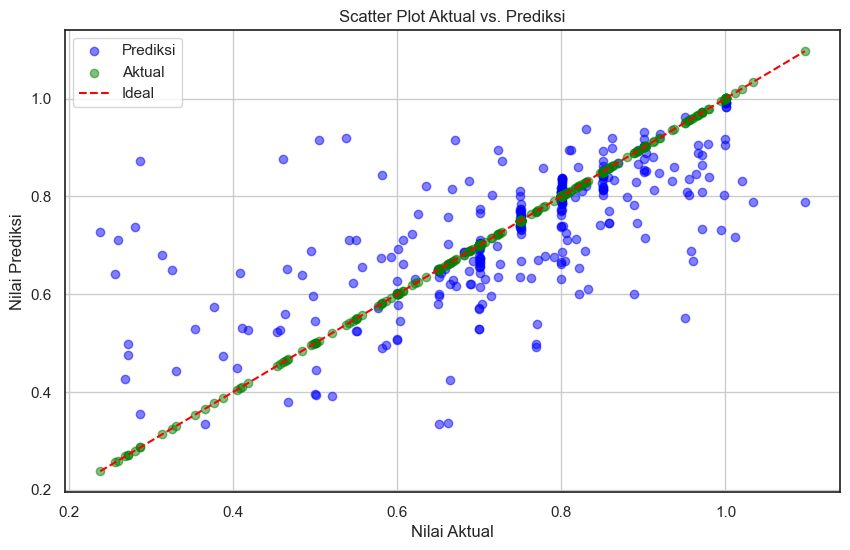

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

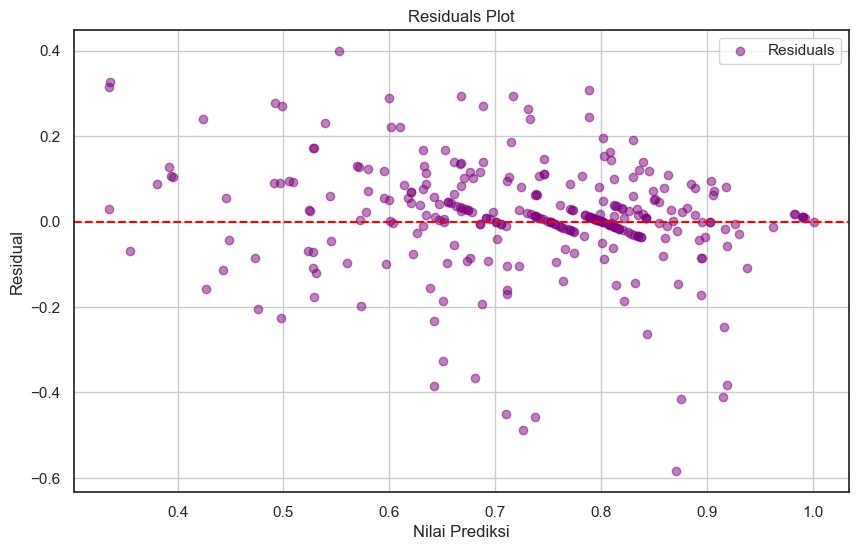

In [32]:
regression_model_report_viz(y_test, y_tt_cat_best)

#### Random Forest

In [33]:
rf_cv = RandomForestRegressor()

parameter_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [0, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_cv_rf = RandomizedSearchCV(rf_cv,
                                param_distributions=parameter_rf,
                                n_iter=50,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=0)

grid_cv_rf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [0, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B63DEB4BD0>},
                   scoring='neg_mean_squared_error')

In [34]:
grid_cv_rf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 139}

In [35]:
grid_cv_rf.best_score_

-0.01542395002740873

In [36]:
rf_best = RandomForestRegressor(max_depth=20,
                                max_features='sqrt',
                                min_samples_leaf=1,
                                min_samples_split=10,
                                n_estimators=72)

rf_best.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=10,
                      n_estimators=72)

In [37]:
y_tt_rf_best = rf_best.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0800
MSE: 0.0156
RMSE: 0.1250
sMAPE: 12.3539%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

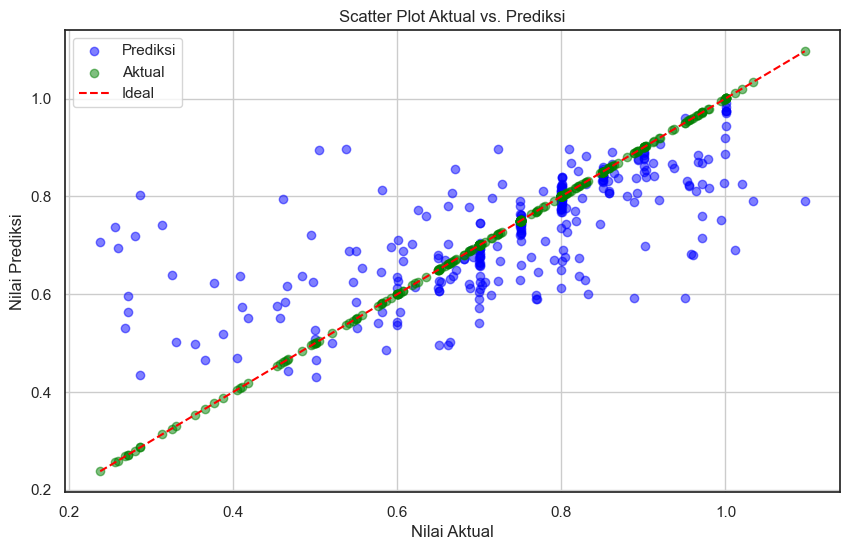

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

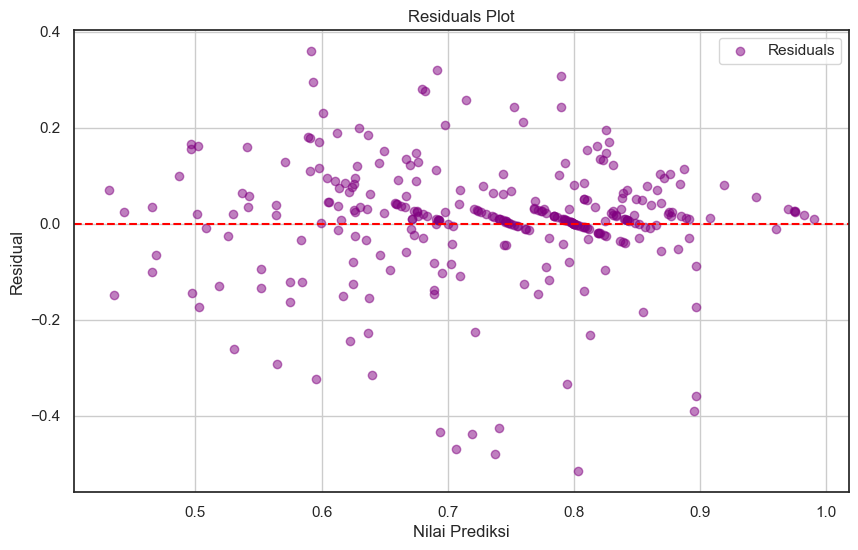

In [38]:
regression_model_report_viz(y_test, y_tt_rf_best)

#### XGBoost

In [39]:
xgb_cv = xgb.XGBRegressor()

parameter_xgb = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'colsample_bytree': np.linspace(0.3, 0.7, 5),
    'n_estimators': randint(50, 200)
}

grid_cv_xgb = RandomizedSearchCV(xgb_cv,
                                 param_distributions=parameter_xgb,
                                 n_iter=50,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 verbose=0)

grid_cv_xgb.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                                        'max_depth': [4, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B63C8D3A90>},
                   scoring='neg_mean_squared_error')

In [40]:
grid_cv_xgb.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.09999999999999998,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 122}

In [41]:
# MSE Negatif    
grid_cv_xgb.best_score_

-0.01504315703870919

In [42]:
xgb_best = xgb.XGBRegressor(colsample_bytree=0.4,
                            gamma=0,
                            learning_rate=0.11,
                            max_depth=4,
                            min_child_weight=3,
                            n_estimators=93)

xgb_best.fit(X_train, y_train)

<IPython.core.display.Javascript object>

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=93, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_tt_xgb_best = xgb_best.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0810
MSE: 0.0163
RMSE: 0.1276
sMAPE: 12.4588%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

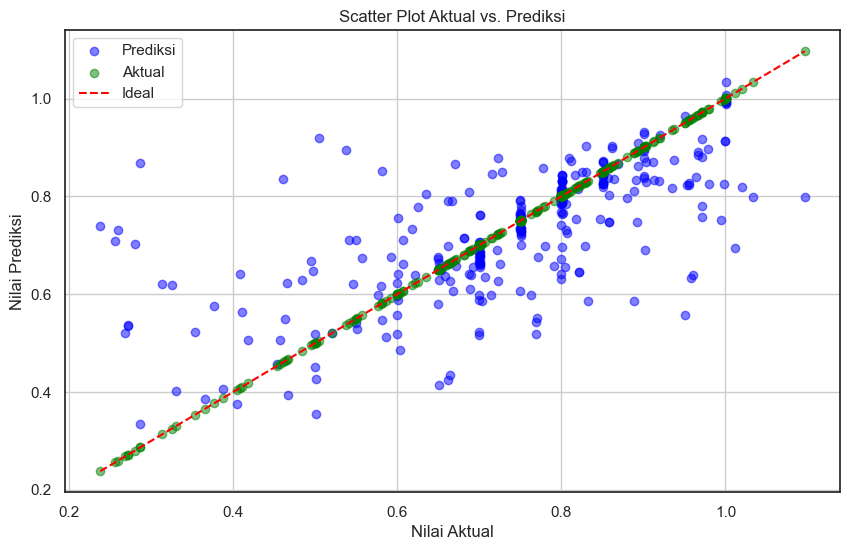

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

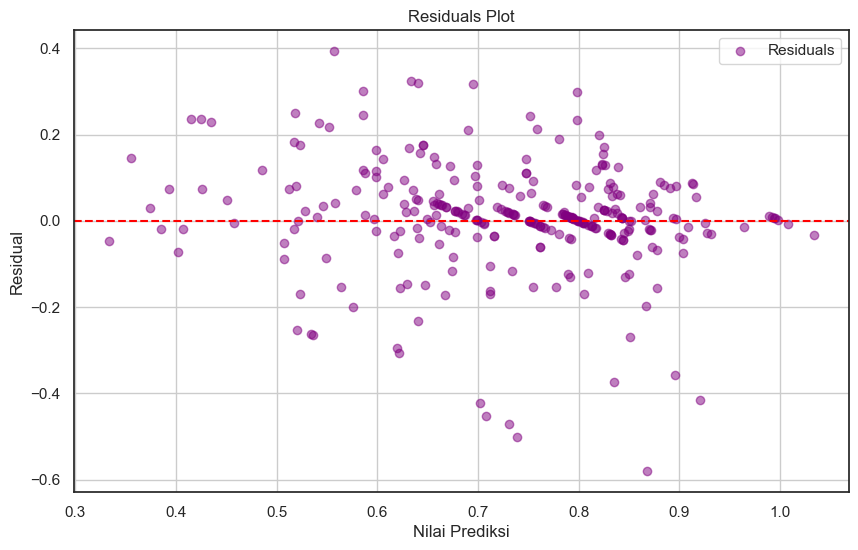

In [44]:
regression_model_report_viz(y_test, y_tt_xgb_best)

### Kesimpulan Modelling
Model `Random Forest` setelah diterapkan Hyperparameter Tuning memiliki performa yang terbaik dalam memprediksi `actual_productivity` jika dibandingkan dengan model lainnya. Hal ini dibuktikan dengan nilai parameter evaluasi MAE, MSE, RMSE, dan SMAPE yang cukup rendah dan tidak menunjukkan adanya **overfitting** dan sedang dalam kondisi **good fit** sehingga menjadikan model Random Forest tersebut merupakan model terbaik.

In [45]:
# path2 = 'C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/RandomForest_Productivity.pkl'

# with open(path2, 'wb') as file:
#     pickle.dump(rf_best, file)

<IPython.core.display.Javascript object>